# Load and View Fashion-MNIST Data

Michael Madden, Jan 2023.

This is sample code to load data from the Fashion-MNIST dataset, and view some images.
The function laod_mnist() below is taken from the Fashion-MNIST github site.

Note that the images as displayed are quite fuzzy looking, because they are low res (28x28).

Before running this:
* Download the four files (t10k-images, t10k-labels, train-images, train-labels) from here:
https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion
* No need to unzip etc. 

The Fashion-MNIST labels are:

|Label | Description |
|------|--------|
|0 | T-shirt/top|
|1 | Trouser|
|2 | Pullover|
|3 | Dress|
|4 | Coat|
|5 | Sandal|
|6 | Shirt|
|7 | Sneaker|
|8 | Bag|
|9 | Ankle boot|

In [5]:
import matplotlib.pyplot as plt

In [1]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [2]:
(train_imgs, train_labels) = load_mnist('./fashion-mnist-data', 'train')

In [3]:
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

# Note: you should find your images is 60000 x 784, and labels is 60000 scalars.
# There are 60,000 images, and each image is a 28x28 = 784 pixels.
# Each label is a single value corresponding to T-shirt, Trouser, etc.

Shape of images is (60000, 784), labels is (60000,)


In [6]:
def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]
    
    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28) 
    
    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()

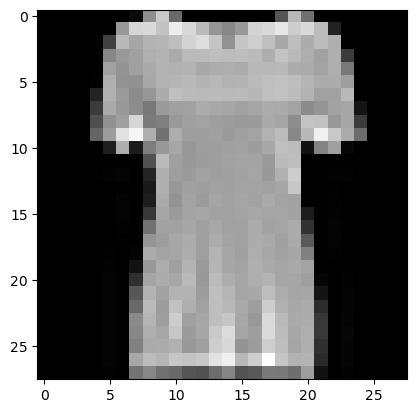

In [7]:

visualise(train_imgs, 10)

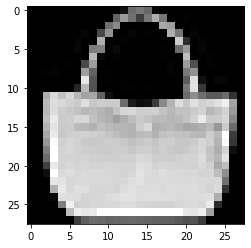

Image 100 : Class is  Bag class id= 8


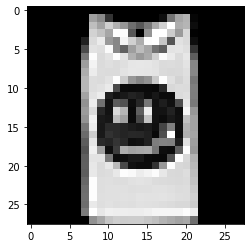

Image 101 : Class is  T-shirt/top class id= 0


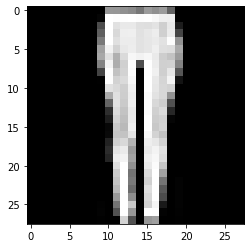

Image 102 : Class is  Trouser class id= 1


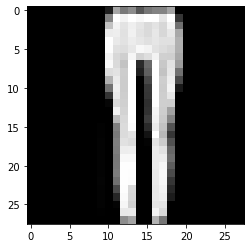

Image 103 : Class is  Trouser class id= 1


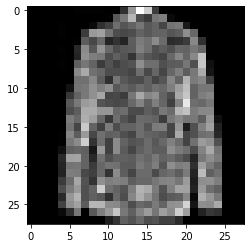

Image 104 : Class is  Shirt class id= 6


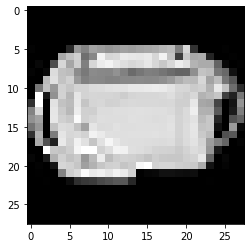

Image 105 : Class is  Bag class id= 8


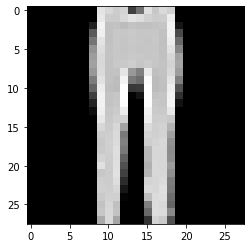

Image 106 : Class is  Trouser class id= 1


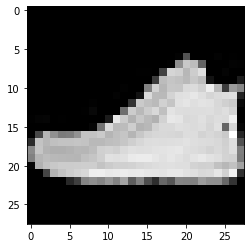

Image 107 : Class is  Ankle boot class id= 9


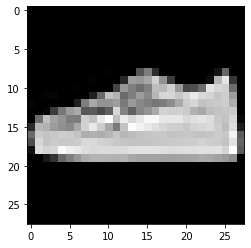

Image 108 : Class is  Sneaker class id= 7


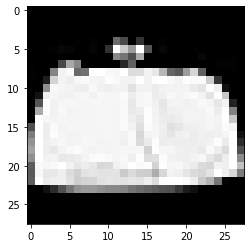

Image 109 : Class is  Bag class id= 8


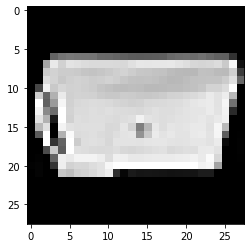

Image 110 : Class is  Bag class id= 8


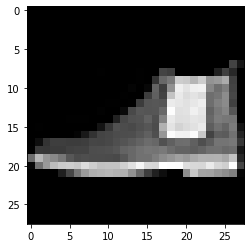

Image 111 : Class is  Ankle boot class id= 9


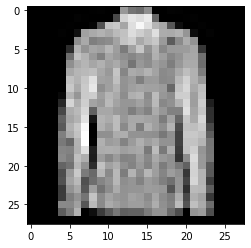

Image 112 : Class is  Shirt class id= 6


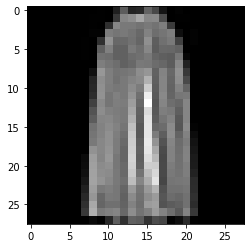

Image 113 : Class is  Shirt class id= 6


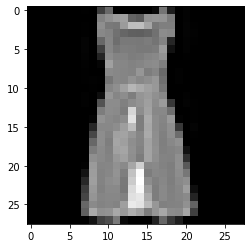

Image 114 : Class is  Dress class id= 3


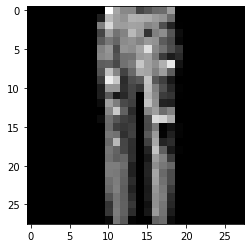

Image 115 : Class is  Trouser class id= 1


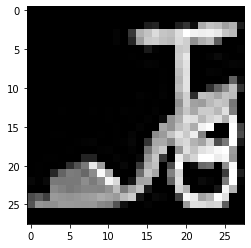

Image 116 : Class is  Sandal class id= 5


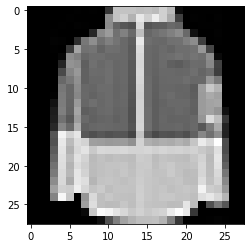

Image 117 : Class is  Coat class id= 4


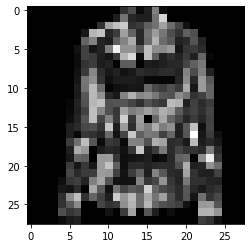

Image 118 : Class is  Shirt class id= 6


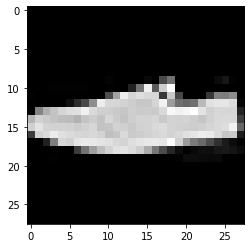

Image 119 : Class is  Sneaker class id= 7


In [11]:
# Display a few images that we loaded
for i in range (100,120):
   visualise(train_imgs, i)
   print("Image", i,": Class is ", label_names[train_labels[i]], "class id=", train_labels[i])